In [25]:
import cv2
from openpiv import piv, pyprocess, validation, tools
import numpy as np

0


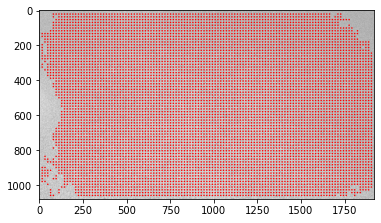

1


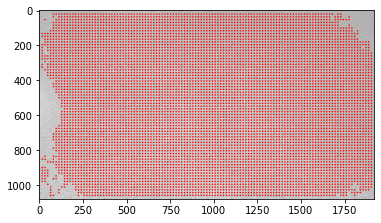

2


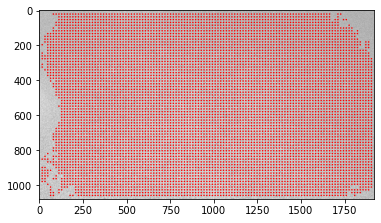

3


KeyboardInterrupt: 

In [37]:
cap = cv2.VideoCapture("test19-original.mp4")
success, image1 = cap.read()
count = 0
U = []
V = []

windowsize = 24
searchsize = 64
overlap = 12
dt = 0.03

while success and count < 30*20:
    success, image2 = cap.read()
    if success:
        print(count)
        x, y, u, v = piv.simple_piv(
            image1.sum(axis=2), image2.sum(axis=2), plot=True
        )
        # image1 = image2.copy()
        count += 1
        U.append(u)
        V.append(v)


In [40]:
cap = cv2.VideoCapture("test19-original.mp4")
success, image1 = cap.read()
count = 0
U = []
V = []

windowsize = 24
overlap = 12
searchsize = 64
dt = 0.03

while success and count < 30*20:
    success, image2 = cap.read()
    if success:
        print(count)
        # x, y, u, v = piv.simple_piv(
        #     image1.sum(axis=2), image2.sum(axis=2), plot=True
        # )
        u, v, sig2noise = pyprocess.extended_search_area_piv(
            image1.astype(np.int32),
            image2.astype(np.int32),
            window_size=windowsize,
            overlap=overlap,
            dt=dt,
            search_area_size=searchsize,
            sig2noise_method='peak2peak'
        )
        x, y = pyprocess.get_coordinates(
            image_size=image1.shape,
            search_area_size=searchsize,
            overlap=overlap
        )
        u, v, mask = validation.sig2noise_val(u, v, sig2noise, threshold=1.05)

        image1 = image2.copy()
        count += 1
        U.append(u)
        V.append(v)

0


ValueError: operands could not be broadcast together with shapes (3,) (2,) 